### Import Libraries and Data

In [38]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import gensim
import spacy
import string

In [149]:
data = pd.read_csv('USvideos.csv')
data['category_id'] =  data['category_id'].astype(str).astype(int)
data.shape

(40949, 16)

In [3]:
description = data[['video_id', 'description']]

In [4]:
print(len(description.video_id))
print(len(set(description.video_id)))

40949
6351


## Description

### Remove Duplicates

In [73]:
description_unique = description.drop_duplicates() # some videos changed description 

In [74]:
description_unique.shape
description_unique.index = range(0, description_unique.shape[0])

In [75]:
np.sum(description_unique.description.str.len()) # total length for description

7181805.0

In [76]:
np.mean(description_unique.description.str.len()) # average length for description

1032.016812760454

### Lowercase

In [48]:
description_unique['description'] = description_unique['description'].str.lower()

In [77]:
description_unique.head()

,video_id,description
0,2kyS6SvSYSE,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,"One year after the presidential election, John..."
2,5qpjK5DgCt4,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,I know it's been a while since we did this sho...


### Replace Link by "link" String

In [79]:
description_unique['description'] = description_unique['description'].apply(str)

In [80]:
reg_str = [
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+' # Link pattern
]

In [81]:
reg_tokens = re.compile(r'('+'|'.join(reg_str)+')', re.VERBOSE | re.IGNORECASE)

In [82]:
def replace_func(string):
    return re.sub(reg_tokens, 'link', string)

In [83]:
description_unique['link'] = description_unique.description.apply(replace_func)

In [84]:
description_unique.head()

,video_id,description,link
0,2kyS6SvSYSE,SHANTELL'S CHANNEL - https://www.youtube.com/s...,SHANTELL'S CHANNEL - link - link this video in...
1,1ZAPwfrtAFY,"One year after the presidential election, John...","One year after the presidential election, John..."
2,5qpjK5DgCt4,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► link...
3,puqaWrEC7tY,Today we find out if Link is a Nickelback amat...,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,I know it's been a while since we did this sho...,I know it's been a while since we did this sho...


In [87]:
description_unique.link[0]

"SHANTELL'S CHANNEL - link - link this video in 4k on this -- link this lens -- link drone - link GEAR ---  link CAMERA link CAMERA; link LENS; link SONY CAMERA; link Canon CAMERA; link TRIPOD THING; link NEED THIS FOR THE BENDY TRIPOD; link LENS; link EXPENSIVE WIDE LENS; link CAMERA; link link MICROPHONE; link DRONE (cheaper but still great);link me; on link link link intro song by link disclosure.  THIS IS NOT AN AD.  not selling or promoting anything.  but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make.  hope that's clear.  if not ask in the comments and i'll answer any specifics."

### Punctuation ?

### Remove Stopwords

In [101]:
stop_words = set(stopwords.words('english')) 
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence) 
    
#     filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    
    return filtered_sentence

In [102]:
description_unique['clean_list'] = description_unique.link.apply(remove_stopwords)

In [108]:
def remove_punctuations(sentence):
    word_tokens = word_tokenize(sentence) 
    
#     filtered_sentence = [w for w in word_tokens if not w in string.punctuation] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in string.punctuation: 
            filtered_sentence.append(w)
    
    return filtered_sentence

In [103]:
description_unique['clean'] = description_unique.clean_list.apply(lambda x: ' '.join(x))

In [111]:
newline_str = [
    r'\\n' # new line pattern
]
reg_tokens = re.compile(r'('+'|'.join(newline_str)+')', re.VERBOSE | re.IGNORECASE)
def newline_func(string):
    return re.sub(reg_tokens, ' ', string)

In [112]:
description_unique['clean'] = description_unique.clean.apply(newline_func)

In [113]:
description_unique['clean'][0]

"SHANTELL 'S CHANNEL - link - link video 4k -- link lens -- link drone - link GEAR -- - link CAMERA link CAMERA ; link LENS ; link SONY CAMERA ; link Canon CAMERA ; link TRIPOD THING ; link NEED THIS FOR THE BENDY TRIPOD ; link LENS ; link EXPENSIVE WIDE LENS ; link CAMERA ; link link MICROPHONE ; link DRONE ( cheaper still great ) ; link ; link link link intro song link disclosure . THIS IS NOT AN AD . selling promoting anything . samsung produce Shantell Video 'GALAXY PROJECT ' initiative enables creators like Shantell make projects might otherwise opportunity make . hope 's clear . ask comments 'll answer specifics ."

In [110]:
description_unique['clean_list'] = description_unique.clean.apply(remove_punctuations)

In [115]:
description_unique['clean_list'][0]

['SHANTELL',
 "'S",
 'CHANNEL',
 'link',
 'link',
 'video',
 '4k',
 '--',
 'link',
 'lens',
 '--',
 'link',
 'drone',
 'link',
 'GEAR',
 '--',
 'link',
 'CAMERA',
 'link',
 'CAMERA',
 'link',
 'LENS',
 'link',
 'SONY',
 'CAMERA',
 'link',
 'Canon',
 'CAMERA',
 'link',
 'TRIPOD',
 'THING',
 'link',
 'NEED',
 'THIS',
 'FOR',
 'THE',
 'BENDY',
 'TRIPOD',
 'link',
 'LENS',
 'link',
 'EXPENSIVE',
 'WIDE',
 'LENS',
 'link',
 'CAMERA',
 'link',
 'link',
 'MICROPHONE',
 'link',
 'DRONE',
 'cheaper',
 'still',
 'great',
 'link',
 'link',
 'link',
 'link',
 'intro',
 'song',
 'link',
 'disclosure',
 'THIS',
 'IS',
 'NOT',
 'AN',
 'AD',
 'selling',
 'promoting',
 'anything',
 'samsung',
 'produce',
 'Shantell',
 'Video',
 "'GALAXY",
 'PROJECT',
 'initiative',
 'enables',
 'creators',
 'like',
 'Shantell',
 'make',
 'projects',
 'might',
 'otherwise',
 'opportunity',
 'make',
 'hope',
 "'s",
 'clear',
 'ask',
 'comments',
 "'ll",
 'answer',
 'specifics']

### Load Pre Train Model - Glove on Twitter and Google

In [59]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

In [60]:
GloveModel = loadGloveModel('GLOVE/glove.twitter.27B.25d.txt')

Loading Glove Model
Done. 1193515  words loaded!


In [61]:
len(GloveModel['aggressive'])

25

In [23]:
type(GloveModel)

dict

In [23]:
# Load Google's pre-trained Word2Vec model.
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

In [24]:
len(GoogleModel['aggressive'])

300

In [25]:
type(GoogleModel)

gensim.models.keyedvectors.Word2VecKeyedVectors

### Sentence Vector by averaging of Word2Vec vectors 

In [267]:
def avg_feature_vector(words, model, num_features):
    ''''''
    # function to average all words vectors in a given sentence
    # Input: words [corpus], 
    #        the word2vec model, 
    #        the length of a word vector
    # Output: featureVec [the feature sentence vector]
    ''''''
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0
    if model == GloveModel:
        for word in words:
            if word in model.keys():
                nwords = nwords+1
                featureVec = np.add(featureVec, model[word])

        if(nwords>0):
            featureVec = np.divide(featureVec, nwords)
    else:
        for word in words:
            if word in model.wv.vocab.keys():
                nwords = nwords+1
                featureVec = np.add(featureVec, model[word])

        if(nwords>0):
            featureVec = np.divide(featureVec, nwords)
    return featureVec

In [34]:
# description_unique['glove'] = description_unique.apply(lambda x: list(avg_feature_vector(x['clean'], GloveModel, 100)), 
#                                                        axis=1)

In [35]:
description_unique['google'] = description_unique.apply(lambda x: list(avg_feature_vector(x['clean'], GoogleModel, 300)), 
                                                        axis=1)

In [36]:
description_unique.head()

,video_id,description,link,clean_list,clean,google
0,2kyS6SvSYSE,shantell's channel - https://www.youtube.com/s...,shantell's channel - link - link this video in...,"[shantell, 's, channel, -, link, -, link, vide...",shantell 's channel - link - link video 4k -- ...,"[-0.14045875, 0.08994518, 0.003810047, 0.14892..."
1,1ZAPwfrtAFY,"one year after the presidential election, john...","one year after the presidential election, john...","[one, year, presidential, election, ,, john, o...","one year presidential election , john oliver d...","[-0.1715387, 0.10685331, -0.016952822, 0.14202..."
2,5qpjK5DgCt4,watch my previous video ▶ \n\nsubscribe ► http...,watch my previous video ▶ \n\nsubscribe ► link...,"[watch, previous, video, ▶, \n\nsubscribe, ►, ...",watch previous video ▶ subscribe ► link watc...,"[-0.14837198, 0.07283222, 0.028169295, 0.14798..."
3,puqaWrEC7tY,today we find out if link is a nickelback amat...,today we find out if link is a nickelback amat...,"[today, find, link, nickelback, amateur, secre...",today find link nickelback amateur secret nick...,"[-0.15685087, 0.08692608, 0.0045597404, 0.1462..."
4,d380meD0W0M,i know it's been a while since we did this sho...,i know it's been a while since we did this sho...,"[know, 's, since, show, ,, 're, back, might, b...","know 's since show , 're back might best episo...","[-0.13672769, 0.08855579, 0.0030439827, 0.1391..."


### Sentence Vector by averaging of Word2Vec vectors with TF-IDF 

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.csr import csr_matrix # need this for saving tfidf_matrix

In [118]:
# concat_func = lambda x: ' '.join(word for word in x)
# corpus_text = list(map(concat_func, text['precision']))

In [119]:
tf = TfidfVectorizer(ngram_range = (1, 1))
tfidf_matrix =  tf.fit_transform(description_unique.clean) 
feature_names = tf.get_feature_names()

In [120]:
tfidf_matrix.shape

(7063, 42016)

In [121]:
description_unique['tfidf_list'] = [[] for i in range(description_unique.shape[0])]
type(description_unique['tfidf_list'][0])

list

In [122]:
for doc in range(description_unique.shape[0]):
    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
    n = len(feature_index)
    if n == 0:
        pass
    else:
        description_unique['tfidf_list'][doc] = [[w, s] for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]]
        
    if doc % 100 == 0:
        print(doc)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000


In [123]:
description_unique['word'] = description_unique.apply(lambda x: list(e[0] for e in x['tfidf_list']), axis=1)

In [124]:
description_unique['value'] = description_unique.apply(lambda x: list(e[1] for e in x['tfidf_list']), axis=1)

In [125]:
description_unique['tfidf_sentence_vector'] = [[0] * len(GloveModel['aggressive'])] * description_unique.shape[0]

In [128]:
for i in range(description_unique.shape[0]):
    ### length of the vector
    featureVec = np.zeros((25), dtype="float32")
    nwords = 0
    for word in description_unique['clean_list'][i]:
        if word in GloveModel.keys() and word in description_unique['word'][i]:
            nwords = nwords+1 
            index_value = description_unique['word'][i].index(word)
            value = description_unique['value'][i][index_value]
            featureVec = np.add(featureVec, GloveModel[word] * value)
    if(nwords>0):
        description_unique['tfidf_sentence_vector'][i] = np.divide(featureVec, nwords)
        
    if i % 100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000


In [129]:
description_unique.head()

,video_id,description,link,clean_list,clean,tfidf_list,word,value,tfidf_sentence_vector
0,2kyS6SvSYSE,SHANTELL'S CHANNEL - https://www.youtube.com/s...,SHANTELL'S CHANNEL - link - link this video in...,"[SHANTELL, 'S, CHANNEL, link, link, video, 4k,...",SHANTELL 'S CHANNEL - link - link video 4k -- ...,"[[shantell, 0.41031983919836235], [channel, 0....","[shantell, channel, link, video, 4k, lens, dro...","[0.41031983919836235, 0.039715528526926704, 0....","[0.2522900312487611, 0.14274832841273197, 0.01..."
1,1ZAPwfrtAFY,"One year after the presidential election, John...","One year after the presidential election, John...","[One, year, presidential, election, John, Oliv...","One year presidential election , John Oliver d...","[[channel, 0.058823250761195295], [link, 0.080...","[channel, link, like, one, year, presidential,...","[0.058823250761195295, 0.08039780635056651, 0....","[0.043884719653652406, 0.06168710618727217, 0...."
2,5qpjK5DgCt4,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► link...,"[WATCH, MY, PREVIOUS, VIDEO, ▶, SUBSCRIBE, ►, ...",WATCH MY PREVIOUS VIDEO ▶ SUBSCRIBE ► link F...,"[[link, 0.4958034468181018], [video, 0.0487212...","[link, video, for, like, subscribe, find, watc...","[0.4958034468181018, 0.04872122110969227, 0.14...","[0.6688884301023011, 0.3401608287929632, 0.087..."
3,puqaWrEC7tY,Today we find out if Link is a Nickelback amat...,Today we find out if Link is a Nickelback amat...,"[Today, find, Link, Nickelback, amateur, secre...",Today find Link Nickelback amateur secret Nick...,"[[link, 0.4734559150111629], [video, 0.0368324...","[link, video, the, intro, is, find, us, offici...","[0.4734559150111629, 0.03683244328900145, 0.03...","[0.32887673214936824, 0.18225819338327617, 0.0..."
4,d380meD0W0M,I know it's been a while since we did this sho...,I know it's been a while since we did this sho...,"[I, know, 's, since, show, 're, back, might, b...","I know 's since show , 're back might best epi...","[[channel, 0.08641144728807448], [link, 0.1181...","[channel, link, might, us, official, new, epis...","[0.08641144728807448, 0.1181045031622395, 0.16...","[0.050219841250754, 0.07130838001383584, 0.009..."


In [136]:
len(description_unique['tfidf_sentence_vector'][0])

25

In [273]:
description_unique.shape

(7063, 9)

In [133]:
description_unique.to_csv('sentence_vector')

In [135]:
description_unique[['video_id', 'description', 'tfidf_sentence_vector']].to_csv('simplified_sentence_vector')

## Description NaN

In [216]:
data['description'] = data['description'].apply(str)

In [217]:
description_NaN = data.loc[data['description'] == 'nan']

In [218]:
description_NaN.shape

(570, 16)

In [228]:
description_NaN = description_NaN.drop_duplicates(subset=['video_id'])
description_NaN = description_NaN[['video_id', 'title', 'tags', 'description']]
description_NaN.index = range(0, description_NaN.shape[0])

In [229]:
description_NaN.shape

(104, 4)

In [ ]:
description_NaN['tags'] = description_NaN.tags.apply(lambda x: '' if x == '[none]' else x)

In [243]:
description_NaN['title_tags'] = description_NaN["title"] + description_NaN["tags"]

In [247]:
description_NaN = description_NaN[['video_id', 'title_tags']]

In [248]:
description_NaN.head()

,video_id,title_tags
0,NZFhMSgbKKM,Dennis Smith Jr. and LeBron James go back and ...
1,sbcbvuitiTc,Stephon Marbury and Jimmer Fredette fight in C...
2,4d07RXYLsJE,Sphaera - demonstrating interaction
3,upEIZAihcwo,Devin Booker has words with Lakers assistant J...
4,U5sCjnezw4o,Jaylen Brown delivers emotional press conferen...


In [249]:
description_NaN['title_tags'] = description_NaN['title_tags'].str.replace('|', ' ')

In [250]:
description_NaN['title_tags'] = description_NaN['title_tags'].str.lower()

In [253]:
description_NaN['title_tags'][18]

'flynn promised \'full cooperation\' to mueller team, prepared to testify   the viewjoy behar "the view" "michael flynn" "robert mueller" "special counsel" "russia" "hot topics" "guilty" "fbi" "federal prosecutor"'

In [257]:
description_NaN['title_tags'] = description_NaN.title_tags.apply(remove_punctuations)
description_NaN['title_tags'] = description_NaN.title_tags.apply(lambda x: ' '.join(x))

In [260]:
description_NaN['title_tags'] = description_NaN['title_tags'].str.replace('``', '')

In [262]:
description_NaN['title_tags'] = description_NaN['title_tags'].str.replace('\'\'', '')

In [268]:
description_NaN['title_tags_vector'] = description_NaN.title_tags.apply(lambda x: list(avg_feature_vector(x, GloveModel, 25)), )

In [269]:
for i in range(25):
    dim = 'd' + str(i)
    description_NaN[dim] = description_NaN['title_tags_vector'].map(lambda x: x[i])

In [270]:
description_NaN.head()

,video_id,title_tags,title_tags_vector,d0,d1,d2,d3,d4,d5,d6,...,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24
0,NZFhMSgbKKM,dennis smith jr. and lebron james go back and ...,"[0.6253052380952381, 0.13910166666666665, -0.2...",0.625305,0.139102,-0.283588,-0.227904,-0.067118,0.169542,0.037962,...,-0.453745,-0.986305,-0.052320,-1.001729,0.403276,-0.219858,-0.460406,0.449210,0.258050,0.272452
1,sbcbvuitiTc,stephon marbury and jimmer fredette fight in c...,"[0.6024717741935487, 0.19855212903225805, -0.3...",0.602472,0.198552,-0.310566,-0.306277,-0.117967,0.142564,-0.033497,...,-0.363655,-0.992073,-0.042332,-0.975748,0.456753,-0.234754,-0.469292,0.463799,0.228424,0.248808
2,4d07RXYLsJE,sphaera demonstrating interaction,"[0.6172538709677418, 0.15337616129032253, -0.2...",0.617254,0.153376,-0.243323,-0.180009,-0.078361,0.121605,0.087295,...,-0.372557,-0.956207,-0.018606,-1.034335,0.290970,-0.148320,-0.423544,0.479937,0.246594,0.312961
3,upEIZAihcwo,devin booker has words with lakers assistant j...,"[0.6890575700934587, 0.13426796261682236, -0.1...",0.689058,0.134268,-0.194336,-0.257809,-0.071194,0.085133,-0.131682,...,-0.474696,-1.046916,-0.032989,-0.970233,0.398769,-0.280712,-0.339293,0.428686,0.337578,0.265754
4,U5sCjnezw4o,jaylen brown delivers emotional press conferen...,"[0.6242389320388355, 0.10606933009708734, -0.2...",0.624239,0.106069,-0.239996,-0.269917,-0.096775,0.071416,0.008835,...,-0.465658,-0.979705,-0.031852,-0.969823,0.367678,-0.195611,-0.383193,0.456702,0.298584,0.309589


In [271]:
description_NaN.to_csv('description_NaN.csv')

## tags

In [76]:
tags_unique = data[['video_id', 'tags']]
tags_unique = tags_unique.drop_duplicates()
tags_unique.shape

(6573, 2)

In [77]:
tags_unique['tags'] = tags_unique['tags'].str.replace('|', ' ')

In [78]:
tags_unique['tags'] = tags_unique['tags'].str.lower()

In [80]:
# tags_unique['glove'] = tags_unique.apply(lambda x: list(avg_feature_vector(x['tags'], GloveModel, 100)), axis=1)

In [81]:
tags_unique['google'] = tags_unique.apply(lambda x: list(avg_feature_vector(x['tags'], GoogleModel, 300)), axis=1)

## Entities

In [352]:
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('en_core_web_sm')

In [ ]:
tags_unique['google'] = tags_unique.apply(lambda x: list(avg_feature_vector(x['tags'], GoogleModel, 300)), axis=1)

In [394]:
doc = nlp(data.description[57])
for entity in doc.ents:
    print(entity.text, entity.label_)

Donald Trump PERSON
13-day DATE
Asia LOC
ABC ORG
This Week today DATE
White House ORG
Kellyanne Conway PERSON
Alabama GPE
GOP ORG
Senate ORG
Roy Moore PERSON
14-year-old DATE
Martha Raddatz PERSON
Conway ORG
Trump ORG
Moore ORG
Asia visit.\n“I ORG
13-day DATE
Conway ORG
\nRaddatz PERSON
Conway ORG
Conway ORG
Roy Moore PERSON
Conway ORG


In [73]:
# for i in range(description_unique.shape[0]):
#     string = description_unique.clean[i]
#     if string.find('donald trump') != -1:
#         print(i)

In [353]:
# Process whole documents
text = (u"When Sebastian Thrun started working on self-driving cars at "
        u"Google in 2007, few people outside of the company took him "
        u"seriously. “I can tell you very senior CEOs of major American "
        u"car companies would shake my hand and turn away because I wasn’t "
        u"worth talking to,” said Thrun, now the co-founder and CEO of "
        u"online higher education startup Udacity, in an interview with "
        u"Recode earlier this week.")
doc = nlp(text)

Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE
my fries were super gross such disgusting fries 0.7139701576579747


In [354]:
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE


In [ ]:
# Determine semantic similarities
doc1 = nlp(u"my fries were super gross")
doc2 = nlp(u"such disgusting fries")
similarity = doc1.similarity(doc2)
print(doc1.text, doc2.text, similarity)

## Wordcloud using Youtube Icon

In [194]:
import string
import matplotlib.pyplot as plt
import matplotlib
from scipy.misc import imread
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator

In [109]:
description_unique.index = range(0, description_unique.shape[0])

In [125]:
description_unique['clean_list'][:5]

0    [shantell, 's, channel, -, link, -, link, vide...
1    [one, year, presidential, election, ,, john, o...
2    [watch, previous, video, ▶, \n\nsubscribe, ►, ...
3    [today, find, link, nickelback, amateur, secre...
4    [know, 's, since, show, ,, 're, back, might, b...
Name: clean_list, dtype: object

In [128]:
# removing punctuation from python list items
# x = [''.join(c for c in s if c not in string.punctuation) for s in x]
description_unique['clean_list'] = description_unique['clean_list'].apply(lambda x: [''.join(c for c in s if c not in string.punctuation) for s in x])

In [129]:
# remove the empty strings
# x = [s for s in x if s]
description_unique['clean_list'] = description_unique['clean_list'].apply(lambda x: [s for s in x if s])

In [158]:
words = []
for i in range(description_unique.shape[0]):
    words.extend(description_unique['clean_list'][i])
#     if i % 1000 == 0:
#         print(i)
#     else:
#         continue

In [159]:
words = [word for word in words if word != 'link']

In [160]:
words = [word for word in words if word != 's']

In [169]:
words = [word for word in words if word != "’"]

In [177]:
words = [word for word in words if word != "”"]

In [180]:
words = [word for word in words if word != "“"]

In [184]:
words = [word for word in words if word != "»"]

In [185]:
words = [word for word in words if word != "n"]

In [203]:
words = [word for word in words if word != "►"]

In [204]:
words = [word for word in words if word != "–"]

In [205]:
words = [word for word in words if word != "m"]

In [206]:
words = [word for word in words if word != "link►"]

In [207]:
words = [word for word in words if word != "2"]

In [210]:
words = [word for word in words if word != "e"]

In [186]:
words_stat['Words'][628]

'add'

In [211]:
len(words)

510393

In [216]:
words_stat = Counter(words)
words_stat = pd.DataFrame(list(words_stat.items()), columns=['Words', 'Counts'])
words_stat = words_stat.sort_values(by=['Counts'], ascending = False)
words_stat.head(5)

,Words,Counts
2,video,3262
170,nlink,2896
77,us,2762
88,videos,2403
119,new,2372


In [217]:
bimg = imread("image/youtube.png")
wordcloud = WordCloud(background_color = 'white', max_font_size = 50, mask = bimg)

In [218]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

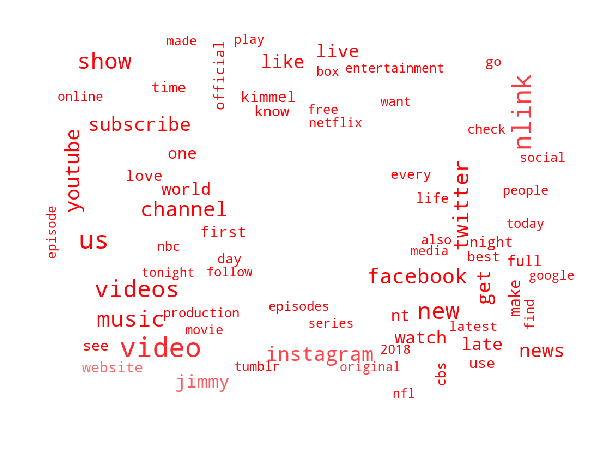

In [225]:
wordfrequency = {x[0]: x[1] for x in words_stat.head(70).values}
wordcloud = wordcloud.fit_words(wordfrequency)
bimgColors = ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func = bimgColors))

In [145]:
simplified_sentence_vector.head()

,video_id,description,tfidf_sentence_vector
0,2kyS6SvSYSE,SHANTELL'S CHANNEL - https://www.youtube.com/s...,"[0.2522900312487611, 0.14274832841273197, 0.01..."
1,1ZAPwfrtAFY,"One year after the presidential election, John...","[0.043884719653652406, 0.06168710618727217, 0...."
2,5qpjK5DgCt4,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"[0.6688884301023011, 0.3401608287929632, 0.087..."
3,puqaWrEC7tY,Today we find out if Link is a Nickelback amat...,"[0.32887673214936824, 0.18225819338327617, 0.0..."
4,d380meD0W0M,I know it's been a while since we did this sho...,"[0.050219841250754, 0.07130838001383584, 0.009..."


In [138]:
simplified_sentence_vector = description_unique[['video_id', 'description', 'tfidf_sentence_vector']]

In [144]:
simplified_sentence_vector['tfidf_sentence_vector'][0]

array([ 0.25229003,  0.14274833,  0.01572145, -0.05263962,  0.2145702 ,
       -0.19384378,  0.03200801,  0.10699621,  0.05203778, -0.07774736,
        0.01846303, -0.06802284, -0.7648342 , -0.17852176, -0.04938299,
        0.10975147,  0.05805057, -0.01807094, -0.18807122, -0.11569733,
       -0.13638507, -0.30166485, -0.02358697,  0.13855556, -0.09866455])

In [146]:
for i in range(25):
    dim = 'd' + str(i)
    simplified_sentence_vector[dim] = simplified_sentence_vector['tfidf_sentence_vector'].map(lambda x: x[i])

In [147]:
simplified_sentence_vector.head()

,video_id,description,tfidf_sentence_vector,d0,d1,d2,d3,d4,d5,d6,...,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24
0,2kyS6SvSYSE,SHANTELL'S CHANNEL - https://www.youtube.com/s...,"[0.2522900312487611, 0.14274832841273197, 0.01...",0.252290,0.142748,0.015721,-0.052640,0.214570,-0.193844,0.032008,...,0.109751,0.058051,-0.018071,-0.188071,-0.115697,-0.136385,-0.301665,-0.023587,0.138556,-0.098665
1,1ZAPwfrtAFY,"One year after the presidential election, John...","[0.043884719653652406, 0.06168710618727217, 0....",0.043885,0.061687,0.023502,-0.059572,0.031956,-0.084432,0.129814,...,0.000108,0.022669,-0.022312,-0.019030,-0.048370,-0.003517,0.005344,-0.021655,-0.058614,-0.037425
2,5qpjK5DgCt4,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"[0.6688884301023011, 0.3401608287929632, 0.087...",0.668888,0.340161,0.087881,-0.135057,0.555201,-0.498481,0.023116,...,0.269990,0.120480,-0.037861,-0.571364,-0.283243,-0.336705,-0.778213,-0.034085,0.392478,-0.175167
3,puqaWrEC7tY,Today we find out if Link is a Nickelback amat...,"[0.32887673214936824, 0.18225819338327617, 0.0...",0.328877,0.182258,0.049331,-0.078383,0.291828,-0.263663,0.047655,...,0.147289,0.074247,-0.031204,-0.296603,-0.141606,-0.183524,-0.397195,-0.030332,0.191098,-0.093867
4,d380meD0W0M,I know it's been a while since we did this sho...,"[0.050219841250754, 0.07130838001383584, 0.009...",0.050220,0.071308,0.009488,-0.031563,0.005529,-0.070886,0.154350,...,0.059546,0.052391,-0.053608,-0.060953,-0.048379,-0.008763,-0.046036,-0.013274,0.047571,-0.049866


In [286]:
simplified_sentence_vector.loc[simplified_sentence_vector['video_id'] == '069D0NmW39o']

,video_id,description,tfidf_sentence_vector,d0,d1,d2,d3,d4,d5,d6,...,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24
52,069D0NmW39o,A timely distraction can create real trouble f...,"[0.028981665780911367, 0.07417111828428, -0.02...",0.028982,0.074171,-0.02666,-0.009949,0.060854,-0.016074,0.094445,...,0.063064,0.035056,0.000352,0.016313,-0.068522,-0.058412,-0.036921,0.001225,-0.012504,-0.064589


In [276]:
simplified_sentence_vector.to_csv('simplified_sentence_vector.csv')